In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random

In [34]:


# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset
start_date = '2020-01-01'
end_date = '2024-12-31'
suppliers = ['Supplier_A', 'Supplier_B', 'Supplier_C', 'Supplier_D']
delivery_modes = ['Air', 'Sea', 'Road', 'Rail']
disruption_types = ['Weather', 'Supplier Issue', 'Logistics', 'Geopolitical', 'None']
regions = ['North America', 'Europe', 'Asia', 'South America']
categories = ['Electronics', 'Apparel', 'Furniture', 'Food & Beverage', 'Automotive']
product_names = {
    'Electronics': ['Laptop', 'Smartphone', 'Headphones', 'Camera', 'Tablet'],
    'Apparel': ['T-Shirt', 'Jeans', 'Jacket', 'Sweater', 'Dress'],
    'Furniture': ['Chair', 'Table', 'Sofa', 'Bed', 'Desk'],
    'Food & Beverage': ['Coffee', 'Tea', 'Chips', 'Juice', 'Cookies'],
    'Automotive': ['Tire', 'Engine Oil', 'Battery', 'Car Seat', 'Brake Pads']
}

# Generate datetime range for Scheduled Deliveries
scheduled_delivery_dates = pd.date_range(start=start_date, end=end_date, freq='h')
num_records = len(scheduled_delivery_dates)

# Generate synthetic dataset
data = {
    "Shipment_ID": [f"SHIP_{i+1}" for i in range(num_records)],
    "Supplier": np.random.choice(suppliers, num_records),
    "Region": np.random.choice(regions, num_records),
    "Delivery_Mode": np.random.choice(delivery_modes, num_records),
    "Scheduled_Delivery": scheduled_delivery_dates,
    "Actual_Delivery": scheduled_delivery_dates + pd.to_timedelta(
        np.random.randint(-5, 15, num_records), unit='D'
    ),
    "Freight_Cost": np.round(np.random.uniform(100, 1000, num_records), 2),
    "Disruption_Type": np.random.choice(disruption_types, num_records, p=[0.2, 0.3, 0.2, 0.1, 0.2]),
    "Weather_Risk": np.random.uniform(0, 1, num_records),
    "Supplier_Reliability": np.random.uniform(0.7, 1.0, num_records),
    "Port_Congestion": np.random.uniform(0, 1, num_records),
    "Stockout_Risk": np.random.uniform(0, 1, num_records),
    "Recovery_Time_Days": np.random.randint(1, 10, num_records)
}

# Calculate delay duration
data["Delay_Duration"] = (data["Actual_Delivery"] - data["Scheduled_Delivery"]).days
data["Delay_Duration"] = [d if d > 0 else 0 for d in data["Delay_Duration"]]  # Negative delays set to 0

# Add realistic Product_ID and Product_Name based on categories
data['Category'] = np.random.choice(categories, num_records)
data['Product_Name'] = [random.choice(product_names[category]) for category in data['Category']]
data['Product_ID'] = [f"{category[:3].upper()}_{i+1}" for i, category in enumerate(data['Category'])]

# Create DataFrame
synthetic_dataset = pd.DataFrame(data)

# Save the dataset to a CSV file
file_path = "supply_chain_disruption_2024_dataset_with_products.parquet"
synthetic_dataset.to_parquet(file_path, index=False)

print(f"Synthetic dataset generated and saved as '{file_path}'.")


Synthetic dataset generated and saved as 'supply_chain_disruption_2024_dataset_with_products.parquet'.


In [35]:
file_path = "supply_chain_disruption_2024_dataset_with_products.parquet"
synthetic_dataset = pd.read_parquet(file_path)
synthetic_dataset.head().T

,0,1,2,3,4
Shipment_ID,SHIP_1,SHIP_2,SHIP_3,SHIP_4,SHIP_5
Supplier,Supplier_C,Supplier_D,Supplier_A,Supplier_C,Supplier_C
Region,Asia,Asia,Asia,South America,North America
Delivery_Mode,Road,Rail,Sea,Sea,Air
Scheduled_Delivery,2020-01-01 00:00:00,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00
Actual_Delivery,2020-01-09 00:00:00,2020-01-12 01:00:00,2020-01-02 02:00:00,2020-01-01 03:00:00,2019-12-31 04:00:00
Freight_Cost,629.62,737.12,895.87,245.2,472.9
Disruption_Type,Supplier Issue,Logistics,Logistics,None,Supplier Issue
Weather_Risk,0.809567,0.691488,0.360454,0.61619,0.492209
Supplier_Reliability,0.889645,0.812494,0.96939,0.885151,0.842387


In [36]:
synthetic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43825 entries, 0 to 43824
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Shipment_ID           43825 non-null  object        
 1   Supplier              43825 non-null  object        
 2   Region                43825 non-null  object        
 3   Delivery_Mode         43825 non-null  object        
 4   Scheduled_Delivery    43825 non-null  datetime64[ns]
 5   Actual_Delivery       43825 non-null  datetime64[ns]
 6   Freight_Cost          43825 non-null  float64       
 7   Disruption_Type       43825 non-null  object        
 8   Weather_Risk          43825 non-null  float64       
 9   Supplier_Reliability  43825 non-null  float64       
 10  Port_Congestion       43825 non-null  float64       
 11  Stockout_Risk         43825 non-null  float64       
 12  Recovery_Time_Days    43825 non-null  int64         
 13  Delay_Duration  

# Feature Engineering

In [37]:
# Pre-Process
from sklearn.preprocessing import LabelEncoder

data = synthetic_dataset.copy()
# Target encoding: Disruption (1 = Yes, 0 = No)
data["Disruption"] = data["Disruption_Type"].apply(lambda x: 0 if x == "None" else 1)

# Encode categorical features
encoder = LabelEncoder()
data["Region"] = encoder.fit_transform(data["Region"])
data["Delivery_Mode"] = encoder.fit_transform(data["Delivery_Mode"])

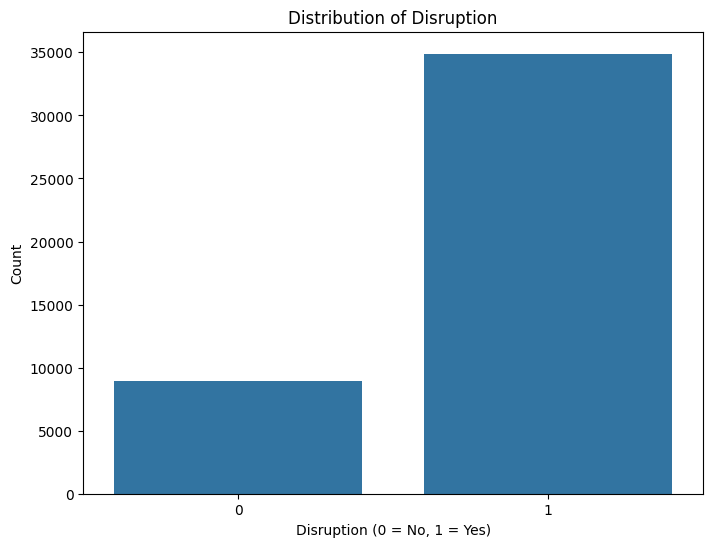

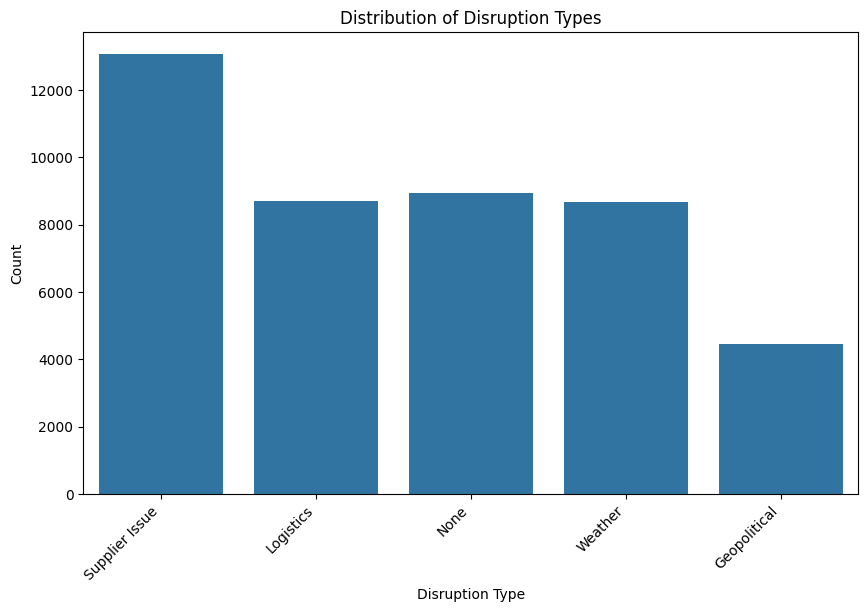

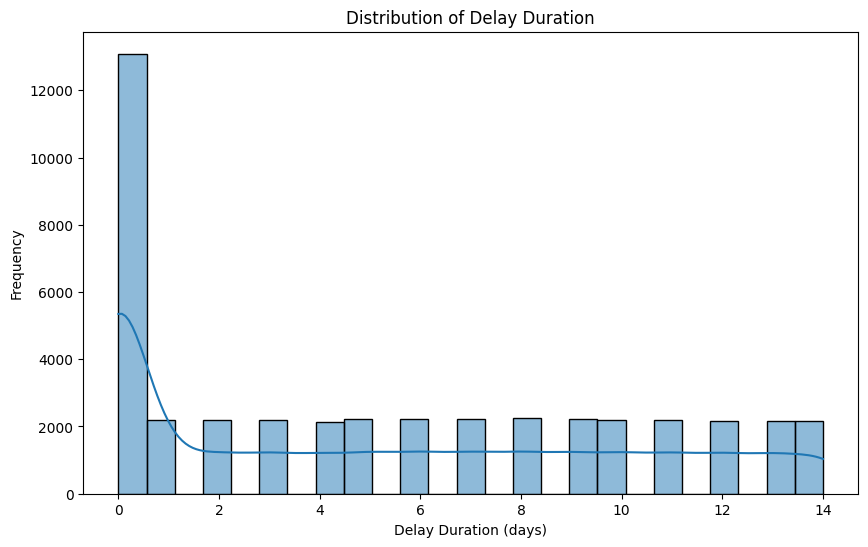

In [38]:

# Distribution of Disruption
plt.figure(figsize=(8, 6))
sns.countplot(x='Disruption', data=data)
plt.title('Distribution of Disruption')
plt.xlabel('Disruption (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Distribution of Disruption Types
plt.figure(figsize=(10, 6))
sns.countplot(x='Disruption_Type', data=data)
plt.title('Distribution of Disruption Types')
plt.xlabel('Disruption Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Distribution of Delay Duration
plt.figure(figsize=(10, 6))
sns.histplot(data['Delay_Duration'], bins=25, kde=True)
plt.title('Distribution of Delay Duration')
plt.xlabel('Delay Duration (days)')
plt.ylabel('Frequency')
plt.show()

In [39]:
# Add temporal features
data["Delay_Duration"] = (data["Actual_Delivery"] - data["Scheduled_Delivery"]).dt.total_seconds() / 3600  # in hours
data["Scheduled_Day"] = data["Scheduled_Delivery"].dt.dayofweek
data["Scheduled_Hour"] = data["Scheduled_Delivery"].dt.hour
data["Scheduled_Month"] = data["Scheduled_Delivery"].dt.month


In [40]:
data.head().T

,0,1,2,3,4
Shipment_ID,SHIP_1,SHIP_2,SHIP_3,SHIP_4,SHIP_5
Supplier,Supplier_C,Supplier_D,Supplier_A,Supplier_C,Supplier_C
Region,0,0,0,3,2
Delivery_Mode,2,1,3,3,0
Scheduled_Delivery,2020-01-01 00:00:00,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00
Actual_Delivery,2020-01-09 00:00:00,2020-01-12 01:00:00,2020-01-02 02:00:00,2020-01-01 03:00:00,2019-12-31 04:00:00
Freight_Cost,629.62,737.12,895.87,245.2,472.9
Disruption_Type,Supplier Issue,Logistics,Logistics,None,Supplier Issue
Weather_Risk,0.809567,0.691488,0.360454,0.61619,0.492209
Supplier_Reliability,0.889645,0.812494,0.96939,0.885151,0.842387


In [41]:
# sort and set index
data.sort_values(by="Scheduled_Delivery", inplace=True)
data.set_index("Scheduled_Delivery", inplace=True)


In [42]:
# Define the window size for rolling features
window_size = [3, 7]

# Generate rolling window features
for window in window_size:
    for col in ["Weather_Risk", "Supplier_Reliability", "Port_Congestion", 'Delay_Duration']:
        data[f"{col}_rolling_mean_{window}"] = data[col].rolling(window=window).mean()
        data[f"{col}_rolling_std_{window}"] = data[col].rolling(window=window).std()

In [43]:
data.head().T

Scheduled_Delivery,2020-01-01 00:00:00,2020-01-01 01:00:00,2020-01-01 02:00:00,2020-01-01 03:00:00,2020-01-01 04:00:00
Shipment_ID,SHIP_1,SHIP_2,SHIP_3,SHIP_4,SHIP_5
Supplier,Supplier_C,Supplier_D,Supplier_A,Supplier_C,Supplier_C
Region,0,0,0,3,2
Delivery_Mode,2,1,3,3,0
Actual_Delivery,2020-01-09 00:00:00,2020-01-12 01:00:00,2020-01-02 02:00:00,2020-01-01 03:00:00,2019-12-31 04:00:00
Freight_Cost,629.62,737.12,895.87,245.2,472.9
Disruption_Type,Supplier Issue,Logistics,Logistics,None,Supplier Issue
Weather_Risk,0.809567,0.691488,0.360454,0.61619,0.492209
Supplier_Reliability,0.889645,0.812494,0.96939,0.885151,0.842387
Port_Congestion,0.059001,0.260969,0.28312,0.664278,0.423318


In [44]:
# add Expanding window feature
for col in ["Weather_Risk", "Supplier_Reliability", "Port_Congestion", 'Delay_Duration']:
    data[f"{col}_expanding_mean"] = data[col].expanding(min_periods=7).mean()

In [45]:
# lag features
lag_steps = [3, 7, 9]
for col in ["Weather_Risk", "Supplier_Reliability", "Port_Congestion"]:
    for lag in lag_steps:
        data[f"{col}_lag_{lag}"] = data[col].shift(lag)

data = data.dropna()

In [46]:
data.head().T

Scheduled_Delivery,2020-01-01 09:00:00,2020-01-01 10:00:00,2020-01-01 11:00:00,2020-01-01 12:00:00,2020-01-01 13:00:00
Shipment_ID,SHIP_10,SHIP_11,SHIP_12,SHIP_13,SHIP_14
Supplier,Supplier_B,Supplier_C,Supplier_C,Supplier_C,Supplier_C
Region,2,2,3,0,2
Delivery_Mode,3,2,1,2,1
Actual_Delivery,2019-12-30 09:00:00,2019-12-27 10:00:00,2019-12-28 11:00:00,2020-01-04 12:00:00,2019-12-27 13:00:00
Freight_Cost,209.23,608.49,820.88,212.76,814.17
Disruption_Type,Weather,None,None,Weather,Geopolitical
Weather_Risk,0.066266,0.416282,0.470941,0.8264,0.216078
Supplier_Reliability,0.85781,0.748459,0.816558,0.760675,0.879822
Port_Congestion,0.520705,0.872811,0.626847,0.649871,0.61899


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43816 entries, 2020-01-01 09:00:00 to 2024-12-31 00:00:00
Data columns (total 49 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Shipment_ID                          43816 non-null  object        
 1   Supplier                             43816 non-null  object        
 2   Region                               43816 non-null  int64         
 3   Delivery_Mode                        43816 non-null  int64         
 4   Actual_Delivery                      43816 non-null  datetime64[ns]
 5   Freight_Cost                         43816 non-null  float64       
 6   Disruption_Type                      43816 non-null  object        
 7   Weather_Risk                         43816 non-null  float64       
 8   Supplier_Reliability                 43816 non-null  float64       
 9   Port_Congestion                      43816 non-n

In [48]:
# drop columns
columns_to_drop = data.select_dtypes(include=['object']).columns
data = data.drop(columns=columns_to_drop)

# Split - Train, Test, SPlit

In [49]:
from sklearn.model_selection import TimeSeriesSplit

In [50]:
data.set_index("Actual_Delivery", inplace=True)

In [51]:
ts_splits = TimeSeriesSplit(n_splits=3)

# Features and target (for example, let's assume Weather_Risk is the target)
X = data.drop(columns=["Disruption"])
y = data["Disruption"]

# Store splits in a list
splits = []

for train_index, test_index in ts_splits.split(X):
    train_size = int(len(train_index) * 0.8)
    valid_index = train_index[train_size:]
    train_index = train_index[:train_size]

    X_train, X_valid, X_test = X.iloc[train_index], X.iloc[valid_index], X.iloc[test_index]
    y_train, y_valid, y_test = y.iloc[train_index], y.iloc[valid_index], y.iloc[test_index]

    splits.append({
        "X_train": X_train,
        "X_valid": X_valid,
        "X_test": X_test,
        "y_train": y_train,
        "y_valid": y_valid,
        "y_test": y_test
    })


In [52]:
# Example: Accessing the first split
first_split = splits[0]
print("First Split - Train, Valid, Test:")
print("X_train:", first_split["X_train"])
print("X_valid:", first_split["X_valid"])
print("X_test:", first_split["X_test"])
print("y_train:", first_split["y_train"])
print("y_valid:", first_split["y_valid"])
print("y_test:", first_split["y_test"])

First Split - Train, Valid, Test:
X_train:                      Region  Delivery_Mode  Freight_Cost  Weather_Risk  \
Actual_Delivery                                                          
2019-12-30 09:00:00       2              3        209.23      0.066266   
2019-12-27 10:00:00       2              2        608.49      0.416282   
2019-12-28 11:00:00       3              1        820.88      0.470941   
2020-01-04 12:00:00       0              2        212.76      0.826400   
2019-12-27 13:00:00       2              1        814.17      0.216078   
...                     ...            ...           ...           ...   
2021-01-04 07:00:00       2              3        316.70      0.996743   
2021-01-07 08:00:00       2              3        545.51      0.399917   
2020-12-26 09:00:00       2              0        671.53      0.948332   
2021-01-12 10:00:00       0              0        569.57      0.913858   
2021-01-10 11:00:00       0              0        106.05      0.64865

In [53]:
first_split["X_train"].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8763 entries, 2019-12-30 09:00:00 to 2021-01-10 11:00:00
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Region                               8763 non-null   int64  
 1   Delivery_Mode                        8763 non-null   int64  
 2   Freight_Cost                         8763 non-null   float64
 3   Weather_Risk                         8763 non-null   float64
 4   Supplier_Reliability                 8763 non-null   float64
 5   Port_Congestion                      8763 non-null   float64
 6   Stockout_Risk                        8763 non-null   float64
 7   Recovery_Time_Days                   8763 non-null   int64  
 8   Delay_Duration                       8763 non-null   float64
 9   Scheduled_Day                        8763 non-null   int32  
 10  Scheduled_Hour                       8763 non-null   int32  

In [54]:
first_split["y_train"].info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 8763 entries, 2019-12-30 09:00:00 to 2021-01-10 11:00:00
Series name: Disruption
Non-Null Count  Dtype
--------------  -----
8763 non-null   int64
dtypes: int64(1)
memory usage: 136.9 KB


# Modeling

## RandomForest

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Initialize arrays to store scores
rf_accuracy_scores = []
rf_f1_scores = []
rf_roc_auc_scores = []

# Train, validate, and test
for split in splits:
    X_train, X_valid, X_test = split["X_train"], split["X_valid"], split["X_test"]
    y_train, y_valid, y_test = split["y_train"], split["y_valid"], split["y_test"]

    # Train model
    model = RandomForestClassifier(random_state=42, verbose=True)
    model.fit(X_train, y_train)

    # Compute Train Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Validate model
    y_valid_pred = model.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_f1 = f1_score(y_valid, y_valid_pred)
    valid_roc_auc = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])

    # Test model
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Store scores
    rf_accuracy_scores.append([train_accuracy, valid_accuracy, test_accuracy])
    rf_f1_scores.append([train_f1, valid_f1, test_f1])
    rf_roc_auc_scores.append([train_roc_auc, valid_roc_auc, test_roc_auc])



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    4.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   12.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   19.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

In [57]:
# Compute and print average RandomForest scores
accuracy_avg = np.mean(rf_accuracy_scores, axis=0)
f1_avg = np.mean(rf_f1_scores, axis=0)
roc_auc_avg = np.mean(rf_roc_auc_scores, axis=0)

print("Average RandomForest Scores:")
print(f"Accuracy: Train = {accuracy_avg[0]:.4f}, Valid = {accuracy_avg[1]:.4f}, Test = {accuracy_avg[2]:.4f}")
print(f"F1 Score: Train = {f1_avg[0]:.4f}, Valid = {f1_avg[1]:.4f}, Test = {f1_avg[2]:.4f}")
print(f"ROC AUC: Train = {roc_auc_avg[0]:.4f}, Valid = {roc_auc_avg[1]:.4f}, Test = {roc_auc_avg[2]:.4f}")

Average RandomForest Scores:
Accuracy: Train = 1.0000, Valid = 0.7982, Test = 0.7959
F1 Score: Train = 1.0000, Valid = 0.8877, Test = 0.8864
ROC AUC: Train = 1.0000, Valid = 0.4964, Test = 0.4986


## LightGBM

In [58]:
!pip install -q lightgbm

In [61]:
import lightgbm as lgb

# Initialize arrays to store LightGBM scores
lgb_accuracy_scores = []
lgb_f1_scores = []
lgb_roc_auc_scores = []

# Train, validate, and test using LightGBM
for split in splits:
    X_train, X_valid, X_test = split["X_train"], split["X_valid"], split["X_test"]
    y_train, y_valid, y_test = split["y_train"], split["y_valid"], split["y_test"]

    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)

    # Set parameters for LightGBM
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }

    # Train LightGBM model
    lgb_model = lgb.train(params,
                         train_data,
                         num_boost_round=100,
                         valid_sets=[valid_data],
                         callbacks=[lgb.early_stopping(stopping_rounds=10)] # Pass early stopping as a callback
                         )


    # Predict on train, validation, and test sets
    y_train_pred = lgb_model.predict(X_train) > 0.5
    y_valid_pred = lgb_model.predict(X_valid) > 0.5
    y_test_pred = lgb_model.predict(X_test) > 0.5

    # Calculate metrics for LightGBM
    lgb_train_accuracy = accuracy_score(y_train, y_train_pred)
    lgb_train_f1 = f1_score(y_train, y_train_pred)
    lgb_train_roc_auc = roc_auc_score(y_train, lgb_model.predict(X_train))

    lgb_valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    lgb_valid_f1 = f1_score(y_valid, y_valid_pred)
    lgb_valid_roc_auc = roc_auc_score(y_valid, lgb_model.predict(X_valid))

    lgb_test_accuracy = accuracy_score(y_test, y_test_pred)
    lgb_test_f1 = f1_score(y_test, y_test_pred)
    lgb_test_roc_auc = roc_auc_score(y_test, lgb_model.predict(X_test))


    # Store LightGBM scores
    lgb_accuracy_scores.append([lgb_train_accuracy, lgb_valid_accuracy, lgb_test_accuracy])
    lgb_f1_scores.append([lgb_train_f1, lgb_valid_f1, lgb_test_f1])
    lgb_roc_auc_scores.append([lgb_train_roc_auc, lgb_valid_roc_auc, lgb_test_roc_auc])

[LightGBM] [Info] Number of positive: 6957, number of negative: 1806
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8226
[LightGBM] [Info] Number of data points in the train set: 8763, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.793906 -> initscore=1.348634
[LightGBM] [Info] Start training from score 1.348634
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.493226
[LightGBM] [Info] Number of positive: 13917, number of negative: 3609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info

In [65]:
# Compute and print average LightGBM scores
avg_lgb_accuracy = np.mean(lgb_accuracy_scores, axis=0)
avg_lgb_f1 = np.mean(lgb_f1_scores, axis=0)
avg_lgb_roc_auc = np.mean(lgb_roc_auc_scores, axis=0)


print(f"Accuracy: Train = {avg_lgb_accuracy[0]:.4f}, Valid = {avg_lgb_accuracy[1]:.4f}, Test = {avg_lgb_accuracy[2]:.4f}")
print(f"F1 Score: Train = {avg_lgb_f1[0]:.4f}, Valid = {avg_lgb_f1[1]:.4f}, Test = {avg_lgb_f1[2]:.4f}")
print(f"ROC AUC: Train = {avg_lgb_roc_auc[0]:.4f}, Valid = {avg_lgb_roc_auc[1]:.4f}, Test = {avg_lgb_roc_auc[2]:.4f}")

Accuracy: Train = 0.7937, Valid = 0.7982, Test = 0.7961
F1 Score: Train = 0.8850, Valid = 0.8878, Test = 0.8865
ROC AUC: Train = 0.6434, Valid = 0.5016, Test = 0.5001


## InceptionTimeClassifier

In [66]:
!pip install -q sktime sktime[dl]

In [70]:
import pandas as pd
import numpy as np
from sktime.classification.deep_learning import InceptionTimeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sktime.datatypes import check_raise
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Function to convert 2D numpy array to sktime nested format
def to_sktime_nested_format(X):
    """
    Convert a 2D numpy array to sktime nested format.
    Each row in the input corresponds to one time series (univariate).
    """
    return pd.DataFrame({i: [pd.Series(row)] for i, row in enumerate(X)}).T

# Initialize arrays to store scores
inception_accuracy_scores = []
inception_f1_scores = []
inception_roc_auc_scores = []

# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for numpy array

# Train, validate, and test
for split in splits:
    X_train, X_valid, X_test = split["X_train"], split["X_valid"], split["X_test"]
    y_train, y_valid, y_test = split["y_train"], split["y_valid"], split["y_test"]

    # Fit OneHotEncoder on training data and transform
    X_train_encoded = encoder.fit_transform(X_train[['Region', 'Delivery_Mode']])
    X_valid_encoded = encoder.transform(X_valid[['Region', 'Delivery_Mode']])
    X_test_encoded = encoder.transform(X_test[['Region', 'Delivery_Mode']])

    # Get feature names after one-hot encoding
    encoded_feature_names = encoder.get_feature_names_out(['Region', 'Delivery_Mode'])

    # Create DataFrames for encoded features
    X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
    X_valid_encoded_df = pd.DataFrame(X_valid_encoded, columns=encoded_feature_names, index=X_valid.index)
    X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

    # Concatenate encoded features with original numerical features
    X_train = pd.concat([X_train.drop(columns=['Region', 'Delivery_Mode']), X_train_encoded_df], axis=1)
    X_valid = pd.concat([X_valid.drop(columns=['Region', 'Delivery_Mode']), X_valid_encoded_df], axis=1)
    X_test = pd.concat([X_test.drop(columns=['Region', 'Delivery_Mode']), X_test_encoded_df], axis=1)

    # Convert data to sktime-compatible format
    X_train = to_sktime_nested_format(X_train.values) # Convert to numpy array before nested format
    X_valid = to_sktime_nested_format(X_valid.values)
    X_test = to_sktime_nested_format(X_test.values)

    # Check compatibility (optional, useful for debugging)
    check_raise(X_train, mtype="nested_univ")

    # Train model
    model = InceptionTimeClassifier(
        n_epochs=5, batch_size=64, kernel_size=40, n_filters=32,
        use_residual=True, use_bottleneck=True, bottleneck_size=32, depth=6,
        callbacks=None, random_state=None, verbose=True,
        loss='categorical_crossentropy', metrics=None
    )
    model.fit(X_train, y_train)

    # Compute TRain Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1],  multi_class='ovr')

    # Validate model
    y_valid_pred = model.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    valid_f1 = f1_score(y_valid, y_valid_pred, average='weighted')  # Adjust for multi-class
    valid_roc_auc = roc_auc_score(
    y_valid, model.predict_proba(X_valid)[:, 1], multi_class='ovr'  # Select probabilities for class 1
    )

    # Compute Test Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')

    # Store scores
    inception_accuracy_scores.append([train_accuracy, valid_accuracy, test_accuracy])
    inception_f1_scores.append([train_f1, valid_f1, test_f1])
    inception_roc_auc_scores.append([train_roc_auc, valid_roc_auc, test_roc_auc])


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9             │ (None, 47, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_54          │ (None, 47, 1)          │              0 │ input_layer_9[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_279 (Conv1D)       │ (None, 47, 32)         │          1,280 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_280 (Conv1D)       │ (None, 47, 32)         │            640 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_281 (Conv1D)       │ (None, 47, 32)         │            320 │ input_layer_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_282 (Conv1D)       │ (None, 47, 32)         │             32 │ max_pooling1d_54[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_54            │ (None, 47, 128)        │              0 │ conv1d_279[0][0],      │
│ (Concatenate)             │                        │                │ conv1d_280[0][0],      │
│                           │                        │                │ conv1d_281[0][0],      │
│                           │                        │                │ conv1d_282[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_72    │ (None, 47, 128)        │            512 │ concatenate_54[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_72             │ (None, 47, 128)        │              0 │ batch_normalization_7… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_283 (Conv1D)       │ (None, 47, 32)         │          4,096 │ activation_72[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_55          │ (None, 47, 128)        │              0 │ activation_72[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_284 (Conv1D)       │ (None, 47, 32)         │         40,960 │ conv1d_283[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_285 (Conv1D)       │ (None, 47, 32)         │         20,480 │ conv1d_283[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_286 (Conv1D)       │ (None, 47, 32)         │         10,240 │ conv1d_283[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_287 (Conv1D)       │ (None, 47, 32)         │          4,096 │ max_pooling1d_55[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_55       

 Total params: 422,498 (1.61 MB)

 Trainable params: 420,450 (1.60 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 341ms/step - accuracy: 0.7947 - loss: 0.5319 - learning_rate: 0.0010
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 339ms/step - accuracy: 0.7923 - loss: 0.5153 - learning_rate: 0.0010
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 340ms/step - accuracy: 0.7934 - loss: 0.5114 - learning_rate: 0.0010
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 47s 341ms/step - accuracy: 0.7916 - loss: 0.5151 - learning_rate: 0.0010
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 352ms/step - accuracy: 0.7983 - loss: 0.5061 - learning_rate: 0.0010
137/137 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step
137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 47, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_60          │ (None, 47, 1)          │              0 │ input_layer_10[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_310 (Conv1D)       │ (None, 47, 32)         │          1,280 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_311 (Conv1D)       │ (None, 47, 32)         │            640 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_312 (Conv1D)       │ (None, 47, 32)         │            320 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_313 (Conv1D)       │ (None, 47, 32)         │             32 │ max_pooling1d_60[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_60            │ (None, 47, 128)        │              0 │ conv1d_310[0][0],      │
│ (Concatenate)             │                        │                │ conv1d_311[0][0],      │
│                           │                        │                │ conv1d_312[0][0],      │
│                           │                        │                │ conv1d_313[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_80    │ (None, 47, 128)        │            512 │ concatenate_60[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_80             │ (None, 47, 128)        │              0 │ batch_normalization_8… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_314 (Conv1D)       │ (None, 47, 32)         │          4,096 │ activation_80[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_61          │ (None, 47, 128)        │              0 │ activation_80[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_315 (Conv1D)       │ (None, 47, 32)         │         40,960 │ conv1d_314[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_316 (Conv1D)       │ (None, 47, 32)         │         20,480 │ conv1d_314[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_317 (Conv1D)       │ (None, 47, 32)         │         10,240 │ conv1d_314[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_318 (Conv1D)       │ (None, 47, 32)         │          4,096 │ max_pooling1d_61[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_61       

 Total params: 422,498 (1.61 MB)

 Trainable params: 420,450 (1.60 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 111s 371ms/step - accuracy: 0.7802 - loss: 0.5255 - learning_rate: 0.0010
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 141s 367ms/step - accuracy: 0.7922 - loss: 0.5133 - learning_rate: 0.0010
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 142s 366ms/step - accuracy: 0.7980 - loss: 0.5078 - learning_rate: 0.0010
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 143s 372ms/step - accuracy: 0.7956 - loss: 0.5087 - learning_rate: 0.0010
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 366ms/step - accuracy: 0.7964 - loss: 0.5095 - learning_rate: 0.0010
274/274 ━━━━━━━━━━━━━━━━━━━━ 22s 78ms/step
274/274 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 97ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11            │ (None, 47, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_66          │ (None, 47, 1)          │              0 │ input_layer_11[0][0]   │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_341 (Conv1D)       │ (None, 47, 32)         │          1,280 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_342 (Conv1D)       │ (None, 47, 32)         │            640 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_343 (Conv1D)       │ (None, 47, 32)         │            320 │ input_layer_11[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_344 (Conv1D)       │ (None, 47, 32)         │             32 │ max_pooling1d_66[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_66            │ (None, 47, 128)        │              0 │ conv1d_341[0][0],      │
│ (Concatenate)             │                        │                │ conv1d_342[0][0],      │
│                           │                        │                │ conv1d_343[0][0],      │
│                           │                        │                │ conv1d_344[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_88    │ (None, 47, 128)        │            512 │ concatenate_66[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_88             │ (None, 47, 128)        │              0 │ batch_normalization_8… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_345 (Conv1D)       │ (None, 47, 32)         │          4,096 │ activation_88[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_67          │ (None, 47, 128)        │              0 │ activation_88[0][0]    │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_346 (Conv1D)       │ (None, 47, 32)         │         40,960 │ conv1d_345[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_347 (Conv1D)       │ (None, 47, 32)         │         20,480 │ conv1d_345[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_348 (Conv1D)       │ (None, 47, 32)         │         10,240 │ conv1d_345[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_349 (Conv1D)       │ (None, 47, 32)         │          4,096 │ max_pooling1d_67[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_67       

 Total params: 422,498 (1.61 MB)

 Trainable params: 420,450 (1.60 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/5
411/411 ━━━━━━━━━━━━━━━━━━━━ 166s 378ms/step - accuracy: 0.7776 - loss: 0.5355 - learning_rate: 0.0010
Epoch 2/5
411/411 ━━━━━━━━━━━━━━━━━━━━ 201s 377ms/step - accuracy: 0.7953 - loss: 0.5109 - learning_rate: 0.0010
Epoch 3/5
411/411 ━━━━━━━━━━━━━━━━━━━━ 203s 379ms/step - accuracy: 0.7923 - loss: 0.5140 - learning_rate: 0.0010
Epoch 4/5
411/411 ━━━━━━━━━━━━━━━━━━━━ 202s 379ms/step - accuracy: 0.7986 - loss: 0.5053 - learning_rate: 0.0010
Epoch 5/5
411/411 ━━━━━━━━━━━━━━━━━━━━ 154s 373ms/step - accuracy: 0.7932 - loss: 0.5112 - learning_rate: 0.0010
411/411 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step
411/411 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step


In [72]:
# Compute and print average Inception scores
avg_inception_accuracy = np.mean(inception_accuracy_scores, axis=0)
avg_inception_f1 = np.mean(inception_f1_scores, axis=0)
avg_inception_roc_auc = np.mean(inception_roc_auc_scores, axis=0)

print(f"Accuracy: Train = {avg_inception_accuracy[0]:.4f}, Valid = {avg_inception_accuracy[1]:.4f}, Test = {avg_inception_accuracy[2]:.4f}")
print(f"F1 Score: Train = {avg_inception_f1[0]:.4f}, Valid = {avg_inception_f1[1]:.4f}, Test = {avg_inception_f1[2]:.4f}")
print(f"ROC AUC: Train = {avg_inception_roc_auc[0]:.4f}, Valid = {avg_inception_roc_auc[1]:.4f}, Test = {avg_inception_roc_auc[2]:.4f}")

Accuracy: Train = 0.7937, Valid = 0.7982, Test = 0.7961
F1 Score: Train = 0.8850, Valid = 0.7086, Test = 0.7057
ROC AUC: Train = 0.5173, Valid = 0.5063, Test = 0.4994
